In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns',80)
df_original=pd.read_csv('owid-covid-data.csv',parse_dates=['date'])
df_original

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,2022-09-26,257342.0,2.0,36.000,5599.0,0.0,0.143,16090.388,0.125,2.251,350.079,0.000,0.009,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,2022-09-27,257376.0,34.0,31.429,5599.0,0.0,0.143,16092.513,2.126,1.965,350.079,0.000,0.009,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

In [3]:
df=df_original.copy()
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
42584,COM,Africa,Comoros,2020-09-22,470.0,0.0,0.429,7.0,0.0,0.000,572.036,0.000,0.522,8.520,0.000,0.000,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821626.0,437.352,20.4,2.963,1.726,1413.890,18.1,261.516,11.88,4.4,23.6,15.574,2.20,64.32,0.554,NaN,NaN,NaN,NaN
41716,COL,South America,Colombia,2020-10-08,886179.0,8495.0,7262.857,27180.0,0.0,140.571,17201.827,164.898,140.981,527.597,0.000,2.729,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4032219.0,42048.0,78.270,0.816,38510.0,0.748,0.2090,4.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.30,51516562.0,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
190617,SWE,Europe,Sweden,2022-04-13,2491980.0,0.0,589.714,18506.0,0.0,20.143,238077.473,0.000,56.340,1768.016,0.000,1.924,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18226611.0,3275.0,1741.324,0.313,3718.0,0.355,0.1586,6.3,tests performed,NaN,NaN,NaN,NaN,NaN,28271.0,NaN,NaN,NaN,NaN,2701.0,292.0,0.003,11.11,10467097.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.80,0.945,NaN,NaN,NaN,NaN
53510,DJI,Africa,Djibouti,2020-12-29,5813.0,0.0,3.857,61.0,0.0,0.000,5257.983,0.000,3.489,55.176,0.000,0.000,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,1105557.0,41.285,25.4,4.213,2.380,2705.406,22.5,258.037,6.05,1.7,24.5,NaN,1.40,67.11,0.524,NaN,NaN,NaN,NaN
47122,HRV,Europe,Croatia,2021-07-07,360483.0,141.0,87.286,8224.0,3.0,2.571,88785.964,34.728,21.498,2025.548,0.739,0.633,1.04,NaN,NaN,122.0,30.048,NaN,NaN,NaN,NaN,2176865.0,4982.0,536.156,1.227,4044.0,0.996,0.0216,46.3,people tested,2741251.0,1526876.0,1214375.0,NaN,27125.0,21124.0,67.52,37.61,29.91,NaN,5203.0,4871.0,0.120,36.11,4060135.0,73.726,44.0,19.724,13.053,22669.797,0.7,253.782,5.59,34.3,39.9,NaN,5.54,78.49,0.851,NaN,NaN,NaN,NaN


In [4]:
#To check the number of rows and columns in the dataset
df.shape
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our dataset has 220343 rows and 67 columns


In [5]:
##To get the sum total number of entries in each column
df.nunique()

iso_code                                      244
continent                                       6
location                                      244
date                                         1005
total_cases                                113569
                                            ...  
human_development_index                       154
excess_mortality_cumulative_absolute         7215
excess_mortality_cumulative                  3470
excess_mortality                             4268
excess_mortality_cumulative_per_million      7429
Length: 67, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220343 entries, 0 to 220342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    220343 non-null  object        
 1   continent                                   207670 non-null  object        
 2   location                                    220343 non-null  object        
 3   date                                        220343 non-null  datetime64[ns]
 4   total_cases                                 211377 non-null  float64       
 5   new_cases                                   211112 non-null  float64       
 6   new_cases_smoothed                          209916 non-null  float64       
 7   total_deaths                                192273 non-null  float64       
 8   new_deaths                                  192215 non-null  float64      

In [7]:
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [8]:
#To check for missing values
df.isna().sum()

iso_code                                        0
continent                                   12673
location                                        0
date                                            0
total_cases                                  8966
                                            ...  
human_development_index                     44243
excess_mortality_cumulative_absolute       212883
excess_mortality_cumulative                212883
excess_mortality                           212836
excess_mortality_cumulative_per_million    212883
Length: 67, dtype: int64

In [9]:
##To display all rows and columns with NaN values
df.loc[:,df.isna().any()]

,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Asia,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Asia,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Asia,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Asia,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,Africa,257342.0,2.0,36.000,5599.0,0.0,0.143,16090.388,0.125,2.251,350.079,0.000,0.009,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,Africa,257376.0,34.0,31.429,5599.0,0.0,0.143,16092.513,2.126,1.965,350.079,0.000,0.009,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,Africa,257409.0,33.0,36.143,5602.0,3.0,0.571,16094.577,2.063,2.260,350.267,0.188,0.036,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
#df.dropna(inplace=True)

In [11]:
#Grouping of columns with entries that are in string(categorical)
categorical=[col for col in df.columns if df[col].dtypes=='O']
categorical

['iso_code', 'continent', 'location', 'tests_units']

In [12]:
#Grouping of columns with entries that are in numbers(numerical)
numerical=[col for col in df.columns if df[col].dtypes!='O']
numerical

['date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_

In [13]:
#Checking for duplicates
df.duplicated().value_counts()

False    220343
dtype: int64

In [14]:
#Summarized description of numerical entries
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.113770e+05,2.111120e+05,2.099160e+05,1.922730e+05,192215.000000,191035.000000,210410.000000,210145.000000,208954.000000,191319.000000,191261.000000,190086.000000,166135.000000,28055.000000,28055.000000,30822.000000,30822.000000,7127.000000,7127.000000,14192.000000,14192.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,6.172400e+04,5.901900e+04,5.626100e+04,3.293600e+04,5.075800e+04,1.272010e+05,61724.000000,59019.000000,56261.000000,32936.000000,127201.000000,1.266250e+05,126625.000000,166246.000000,2.190590e+05,195677.000000,181070.000000,179157.000000,180122.000000,180410.000000,117665.000000,180591.000000,189840.000000,136802.000000,134929.000000,88782.000000,160664.000000,205868.000000,176100.000000,7.460000e+03,7460.000000,7507.000000,7460.000000
mean,4.255726e+06,1.246875e+04,1.250363e+04,7.270161e+04,141.395906,142.112030,57243.021817,190.181893,189.702681,676.182104,1.432702,1.432511,0.947654,835.177508,21.046163,4160.975634,156.580595,430.249895,13.243681,5612.435104,97.406067,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,2.825534e+08,1.308363e+08,1.134596e+08,5.756656e+07,9.750004e+05,4.067208e+05,99.307741,46.492255,41.443950,24.749867,2549.569744,1.526124e+05,0.106687,48.344143,1.424601e+08,456.976823,30.623568,8.810444,5.557927,19562.172729,13.629553,261.117112,8.386013,10.674214,32.808133,50.840708,3.084586,73.627345,0.724863,4.709611e+04,9.798906,14.503727,1303.267724
std,2.666748e+07,8.599124e+04,8.407941e+04,3.745871e+05,739.162159,724.681826,102410.645620,1051.298162,649.953240,962.951777,5.141547,3.369582,0.383875,2477.385100,26.236900,10797.723680,191.815519,584.430650,15.213034,13436.621585,98.283314,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.156233e+09,5.352635e+08,4.772595e+08,2.313342e+08,3.722626e+06,2.361280e+06,78.212387,30.208955,29.564121,25.233149,3553.892995,9.634910e+05,0.207138,22.359414,6.942353e+08,2106.407685,9.065986,6.128537,4.163354,20549.481427,20.030356,119.961659,4.732201,10.623786,13.533849,31.840131,2.550048,7.447437,0.149691,1.305588e+05,13.596222,26.623740,1698.241936
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [15]:
#Correlation to check for possible causation
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.705931,0.729626,0.937882,0.472818,0.488424,0.097766,0.014611,0.024536,0.119161,-0.000131,0.000497,0.010073,0.465468,0.010962,0.565957,0.004894,0.210656,-0.121222,0.571210,0.076086,0.857948,0.577006,0.095711,0.011806,0.088550,0.017700,0.044081,-0.017760,0.827756,0.828760,0.830344,0.826513,0.485211,0.518362,0.143934,0.138602,0.126986,0.016012,-0.012383,0.407500,-0.032993,-0.084463,0.611796,-0.016354,0.038384,0.037849,0.036128,0.015943,-0.036504,-0.040950,0.003707,0.001707,-0.003109,0.032524,0.004949,0.018997,0.042696,0.751122,0.103913,-0.017694,0.195366
new_cases,0.705931,1.000000,0.973813,0.723422,0.645001,0.632527,0.057675,0.062272,0.083963,0.076824,0.030250,0.037390,0.030260,0.569294,0.143023,0.709622,0.124122,0.420334,0.111629,0.678988,0.302408,0.446072,0.546933,0.070951,0.069457,0.082975,0.075639,0.177290,-0.015175,0.572911,0.585863,0.578087,0.493192,0.489276,0.509469,0.083259,0.074364,0.070925,-0.014522,0.017402,0.387010,-0.019941,0.011677,0.543814,-0.014846,0.044399,0.045451,0.044859,0.019983,-0.035568,-0.044886,0.000042,0.006072,0.001125,0.030653,0.019054,0.024438,0.046261,0.351089,0.056196,0.083623,0.069586
new_cases_smoothed,0.729626,0.973813,1.000000,0.743245,0.639563,0.651566,0.060421,0.052954,0.086327,0.079392,0.026765,0.039717,0.024802,0.621521,0.158803,0.777469,0.139900,0.479311,0.130434,0.746056,0.336381,0.473535,0.555372,0.075652,0.065635,0.087320,0.077916,0.190981,-0.015996,0.590144,0.602557,0.595065,0.513926,0.485524,0.517357,0.086147,0.076442,0.072819,-0.012454,0.016339,0.392833,-0.020791,0.010684,0.557935,-0.015181,0.045250,0.046301,0.045668,0.020323,-0.036325,-0.045811,0.000121,0.006074,0.001144,0.031242,0.019327,0.024887,0.047193,0.434689,0.045858,0.063770,0.082679
total_deaths,0.937882,0.723422,0.743245,1.000000,0.634357,0.653747,0.046790,0.004689,0.006400,0.130483,0.008402,0.013701,0.015244,0.603009,0.073530,0.651405,0.014609,0.390769,-0.070939,0.677998,0.094976,0.773947,0.583415,0.030814,-0.008802,0.082605,-0.009007,0.029839,-0.018619,0.827588,0.850097,0.830818,0.727147,0.641766,0.669539,0.088551,0.097278,0.073028,-0.084506,0.021288,0.567329,-0.006286,-0.030449,0.706335,-0.020166,0.033406,0.028994,0.026407,0.006376,-0.044054,-0.038597,0.013065,-0.007001,-0.002229,0.042675,-0.006810,0.016314,0.039441,0.925509,0.295698,0.024853,0.318690
new_deaths,0.472818,0.645001,0.639563,0.634357,1.000000,0.976891,-0.026951,0.009166,0.007877,0.035042,0.072179,0.092030,0.021462,0.847743,0.303860,0.850748,0.199093,0.692219,0.368948,0.824755,0.319703,0.363663,0.508814,-0.033631,-0.014839,0.068560,-0.012641,0.123928,-0.019699,0.366390,0.405945,0.356466,0.181019,0.641559

In [16]:
#rename 'location' to 'country'
df.rename(columns={'location':'country'}, inplace=True)
print("\nAfter modifying first column:\n", df.columns)


After modifying first column:
 Index(['iso_code', 'continent', 'country', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_va

In [17]:
##Overview of countries with record of covid
country_covid=pd.DataFrame(df.groupby(['country']).total_cases_per_million.sum()).reset_index().sort_values(by='total_cases_per_million',ascending=False)
country_covid
#df['country'].value_counts()

,country,total_cases_per_million
4,Andorra,2.148641e+08
81,Gibraltar,2.046044e+08
187,San Marino,1.949260e+08
70,Faeroe Islands,1.730174e+08
197,Slovenia,1.729880e+08
...,...,...
173,Pitcairn,0.000000e+00
156,Niue,0.000000e+00
176,Puerto Rico,0.000000e+00
230,United States Virgin Islands,0.000000e+00


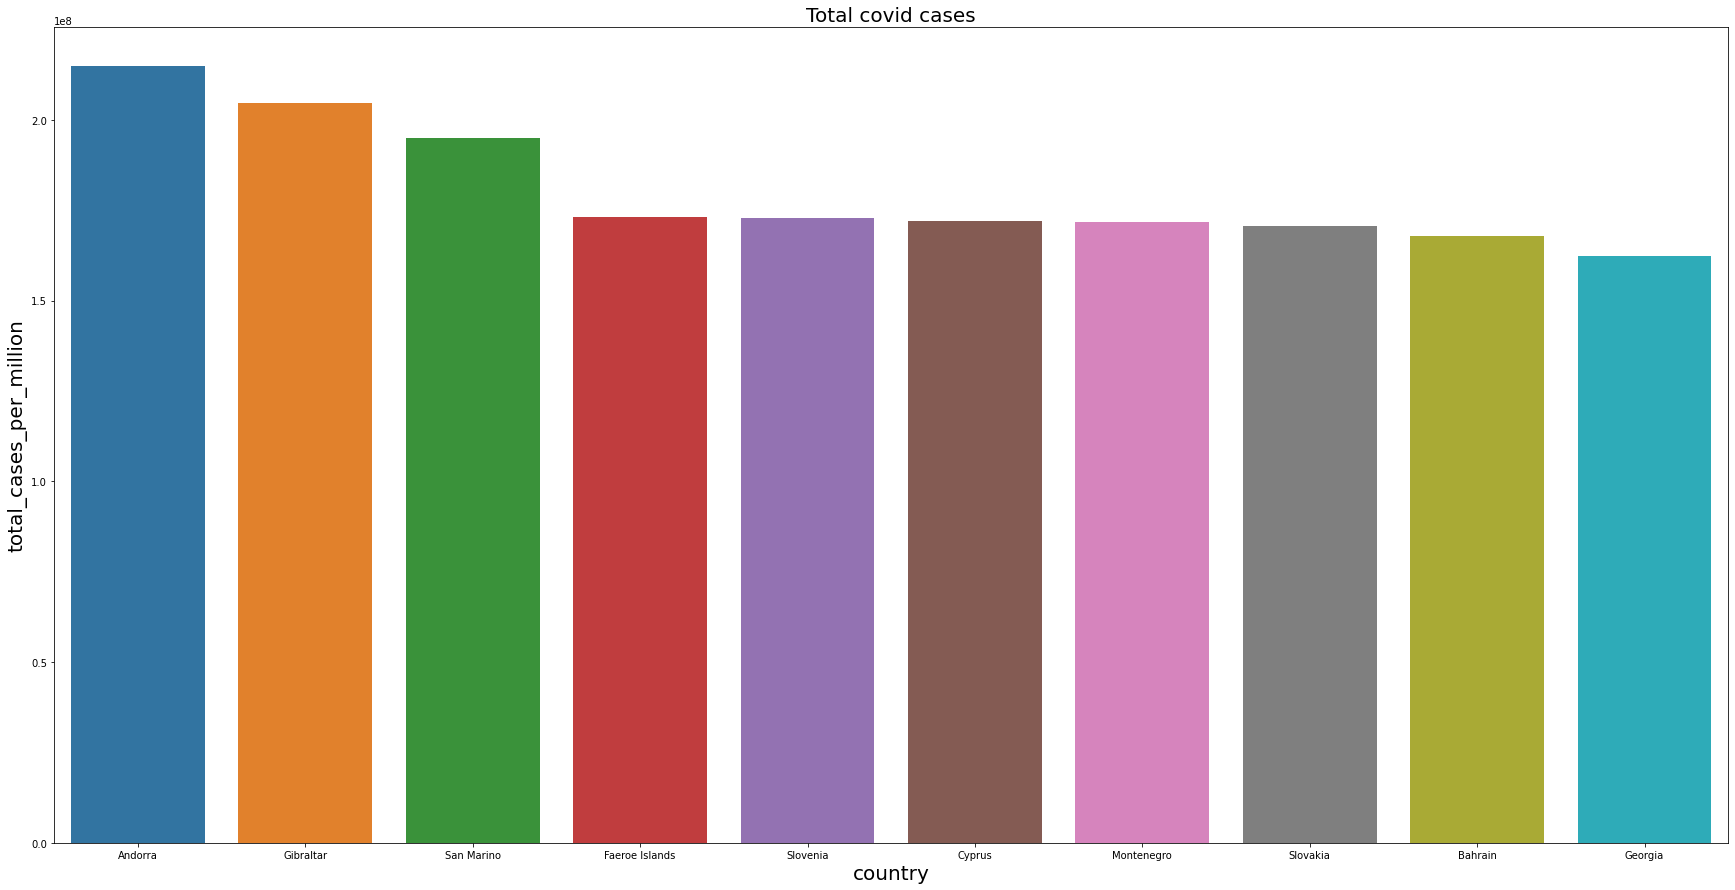

In [18]:

plt.figure(figsize=(30,15))
plt.title('Total covid cases',fontsize=20)
plt.xlabel('country',fontsize=20)
plt.ylabel('total_cases_per_million',fontsize=20)
sns.barplot(x='country',y='total_cases_per_million', data=country_covid[0:10]);

In [19]:
##Overview of continent with record of covid
continent_covid=pd.DataFrame(df.groupby(['continent']).total_cases_per_million.sum()).reset_index().sort_values(by='total_cases_per_million',ascending=False)
continent_covid

,continent,total_cases_per_million
2,Europe,5.694513e+09
1,Asia,2.028048e+09
3,North America,1.872426e+09
5,South America,7.313970e+08
0,Africa,5.937869e+08
4,Oceania,5.600623e+08


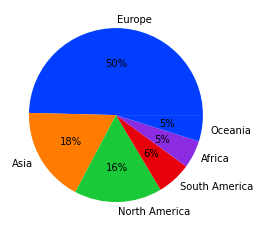

In [20]:
#To view the number of records obtained from each continent.
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')[0:5]

#define labels
labels='continent'
  
# plotting data on chart
plt.pie(data=continent_covid, x='total_cases_per_million',labels=labels, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [21]:
#number of records obtained per continent
df_continent=pd.DataFrame(df['continent'].value_counts().reset_index())
df_continent

,index,continent
0,Africa,50913
1,Europe,47659
2,Asia,47286
3,North America,33898
4,Oceania,15679
5,South America,12235


In [22]:
#rename the columns of the dataframe appropriately
df_continent.rename(columns={'index':'continent','continent':'number of records'}, inplace=True)
df_continent

,continent,number of records
0,Africa,50913
1,Europe,47659
2,Asia,47286
3,North America,33898
4,Oceania,15679
5,South America,12235


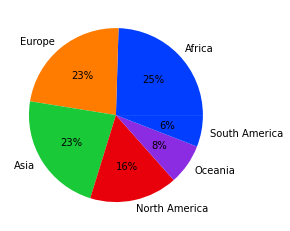

In [23]:
#To view the number of records obtained from each continent.
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')[0:5]

#define labels
labels='continent'
  
# plotting data on chart
plt.pie(data=df_continent, x='number of records',labels=labels, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [24]:
df['date'].unique()

array(['2020-02-24T00:00:00.000000000', '2020-02-25T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', ...,
       '2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2022-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
##Year with highest number of covid cases

dc=df.groupby(df.date.dt.year)['total_cases_per_million'].sum().sort_values(ascending=False)
dc

date
2022    8.616331e+09
2021    3.124640e+09
2020    3.035335e+08
Name: total_cases_per_million, dtype: float64

In [26]:
yearly_total_covid=dc.reset_index().sort_values(by='total_cases_per_million',ascending=False)
yearly_total_covid

,date,total_cases_per_million
0,2022,8.616331e+09
1,2021,3.124640e+09
2,2020,3.035335e+08


In [27]:

d10=df.groupby(df.date.dt.year)['total_cases_per_million','total_deaths_per_million','people_fully_vaccinated_per_hundred'].sum().sort_values(by='date',ascending=False)
d10

C:\Users\HP\AppData\Local\Temp\ipykernel_6184\1683785912.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d10=df.groupby(df.date.dt.year)['total_cases_per_million','total_deaths_per_million','people_fully_vaccinated_per_hundred'].sum().sort_values(by='date',ascending=False)


,total_cases_per_million,total_deaths_per_million,people_fully_vaccinated_per_hundred
date,,,
2022,8.616331e+09,6.983604e+07,1396145.15
2021,3.124640e+09,5.253637e+07,935532.80
2020,3.035335e+08,6.994075e+06,0.14


In [28]:
df.groupby(df.date.dt.year).count()

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,68365,63986,68365,68365,66293,66234,65096,54947,55062,54045,65964,65905,64772,54631,54746,53734,47328,8333,8333,9461,9461,1637,1637,3977,3977,28973,28244,28973,28244,32876,32876,29952,29376,33958,404,398,175,12,349,471,404,398,175,12,471,439,439,53953,68036,61548,57538,56902,57228,56577,37408,57360,59737,43585,42988,27800,51168,64038,55638,2797,2797,2797,2797
2021,86982,82237,86982,86982,82389,82347,82316,76687,76632,76542,82024,81982,81951,76322,76267,76177,67085,11741,11741,12977,12977,3053,3053,5729,5729,36404,35048,36404,35048,47460,47460,44066,43761,48399,37870,36174,33468,12682,31314,71669,37870,36174,33468,12682,71669,70945,70945,65454,86300,76822,70851,70121,70486,70644,45854,70824,74420,53079,52349,34982,62511,81085,68793,3016,3016,3016,3016
2022,64996,61447,64996,64996,62695,62531,62504,60639,60521,60448,62422,62258,62231,60366,60248,60175,51722,7981,7981,8384,8384,2437,2437,4486,4486,14010,12111,14010,12111,23629,23629,21909,21211,24431,23450,22447,22618,20242,19095,55061,23450,22447,22618,20242,55061,55241,55241,46839,64723,57307,52681,52134,52408,53189,34403,52407,55683,40138,39592,26000,46985,60745,51669,1647,1647,1694,1647


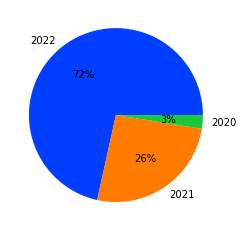

In [29]:
#To view the totally number of covid cases per year.
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')[0:5]

#define labels
labels='date'
  
# plotting data on chart
plt.pie(data=yearly_total_covid, x='total_cases_per_million',labels=labels, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [30]:
ds=pd.DataFrame(df.groupby(['continent','country']).new_cases_per_million.sum()).reset_index().sort_values(by='new_cases_per_million',ascending=False)
ds

,continent,country,new_cases_per_million
115,Europe,Cyprus,656238.166
119,Europe,Faeroe Islands,655309.362
148,Europe,San Marino,616161.918
123,Europe,Gibraltar,615794.271
108,Europe,Andorra,584900.170
...,...,...,...
185,North America,Puerto Rico,0.000
53,Africa,Western Sahara,0.000
86,Asia,Northern Cyprus,0.000
102,Asia,Turkmenistan,0.000


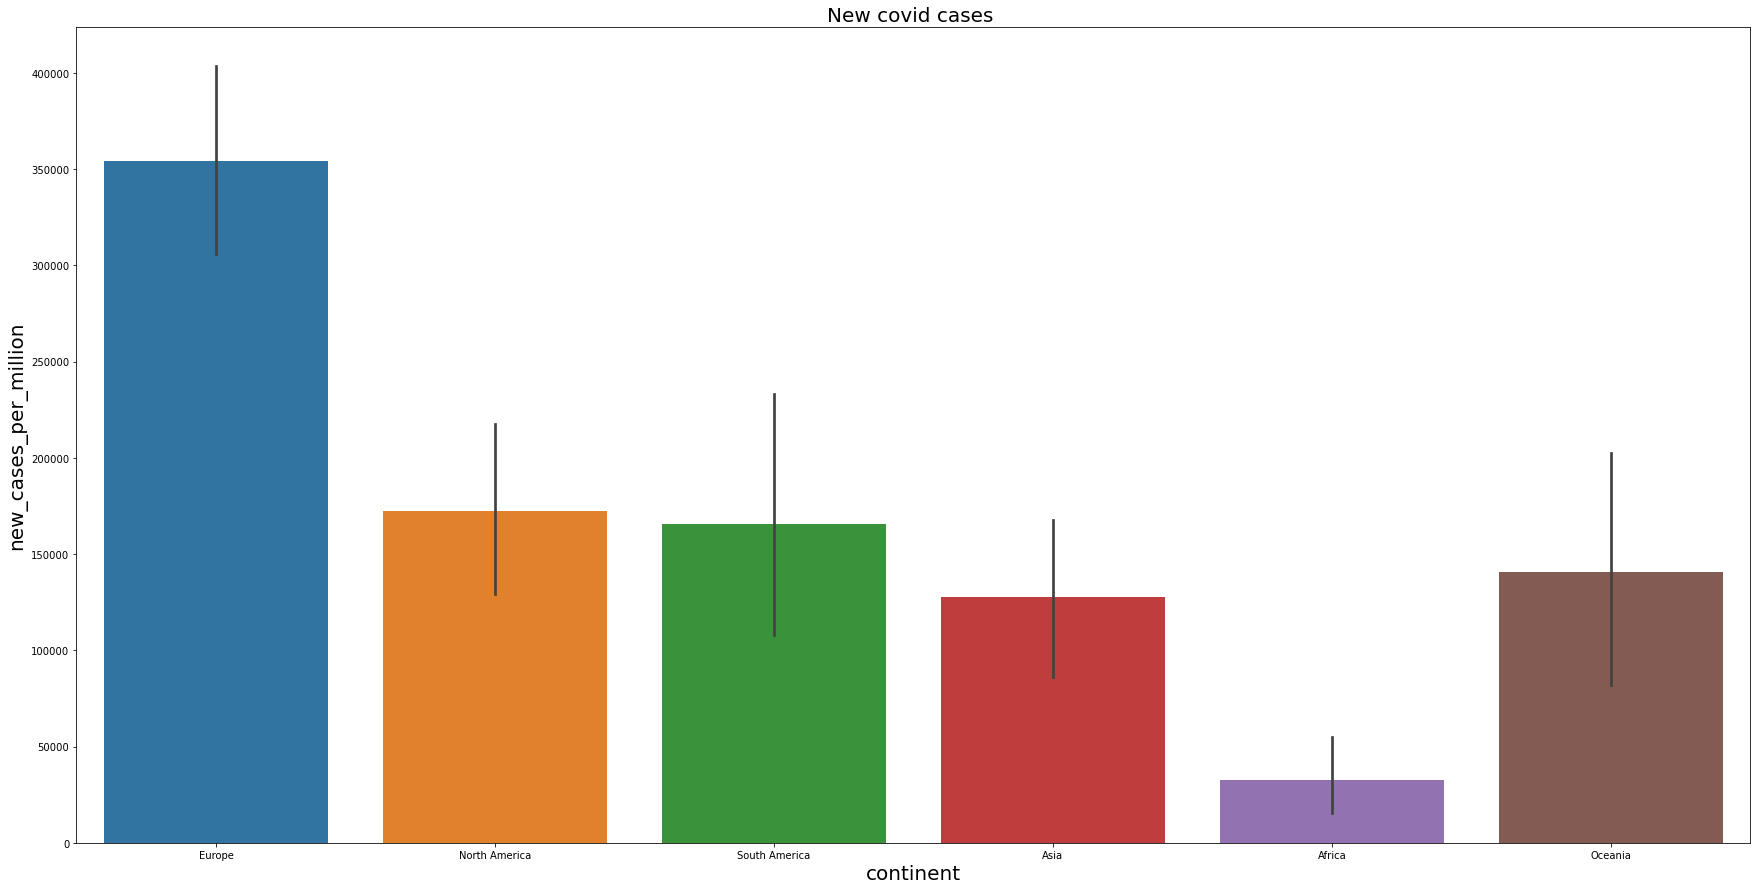

In [31]:
plt.figure(figsize=(30,15))
plt.title('New covid cases ',fontsize=20)
plt.xlabel('continent',fontsize=20)
plt.ylabel('new_cases_per_million',fontsize=20)
sns.barplot(x='continent',y='new_cases_per_million', data=ds);

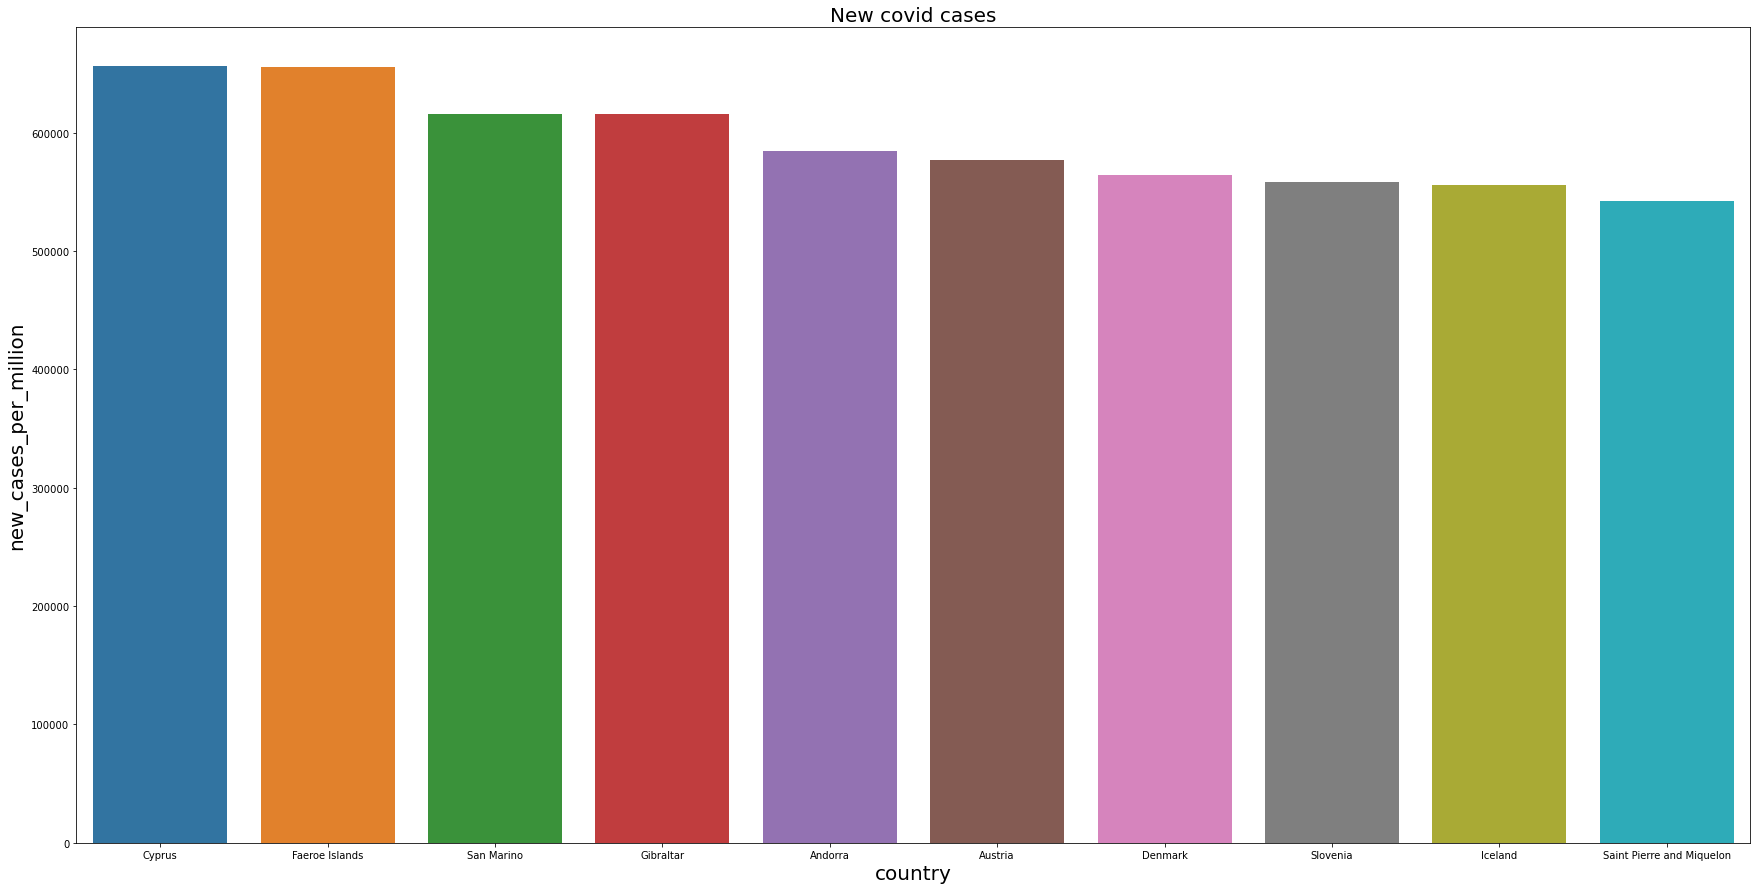

In [32]:
plt.figure(figsize=(30,15))
plt.title('New covid cases',fontsize=20)
plt.xlabel('country',fontsize=20)
plt.ylabel('new_cases_per_million',fontsize=20)
sns.barplot(x='country',y='new_cases_per_million', data=ds[0:10]);